## Exercise 6.4 Supervised ML: Regression

### This script contains the following:

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. Data prep for regression analysis

#### 4. Regression analysis

#### Bonus: performance improvement after removing outliers


#### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# creating path folder 
path = r'C:\Users\cpaul\Documents\Career Foundry\Causes of deaths other than diseases'

# Import dataset, causes_of_deaths_merged.csv to create df
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'causes_of_deaths_cleaned_for_geo.csv'), index_col = False)

In [4]:
df.shape

(10670, 13)

In [5]:
df.head()

,Unnamed: 0,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita
0,0,AFG,Afghanistan,2007,8216,Conflict and Terrorism,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.030317,358.508227
1,2134,AFG,Afghanistan,2007,0,Epidemics,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.015158,358.508227
2,4268,AFG,Afghanistan,2007,0,Famine,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000000,358.508227
3,6402,AFG,Afghanistan,2007,296,Natural Disaster,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.001092,358.508227
4,8536,AFG,Afghanistan,2007,41,Other Injuries,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000151,358.508227


#### 2. Data cleaning

In [6]:
# Drop column "Unnamed: 0"
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
# Drop columns death_percentage and gdp_per_capita which were interpolated and then extrapolated.
# Instead calculate death_percentage and gdp_per_capita from deaths, total_population and gdp_value

df = df.drop(columns = ['death_percentage'])
df = df.drop(columns = ['gdp_per_capita'])

In [9]:
df.head()

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region
0,AFG,Afghanistan,2007,8216,Conflict and Terrorism,27100536.0,9.715765e+09,Low income,Asia,Southern Asia
1,AFG,Afghanistan,2007,0,Epidemics,27100536.0,9.715765e+09,Low income,Asia,Southern Asia
2,AFG,Afghanistan,2007,0,Famine,27100536.0,9.715765e+09,Low income,Asia,Southern Asia
3,AFG,Afghanistan,2007,296,Natural Disaster,27100536.0,9.715765e+09,Low income,Asia,Southern Asia
4,AFG,Afghanistan,2007,41,Other Injuries,27100536.0,9.715765e+09,Low income,Asia,Southern Asia


In [12]:
# Creating new columns, death_percentage and gdp_per_capita

df["death_percentage"] = (df["deaths"] / sum(df["total_population"])) * 100

df["gdp_per_capita"] = (df["gdp_value"] / df["total_population"])

In [13]:
df.head()

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita
0,AFG,Afghanistan,2007,8216,Conflict and Terrorism,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,2.058784e-06,358.508227
1,AFG,Afghanistan,2007,0,Epidemics,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000000e+00,358.508227
2,AFG,Afghanistan,2007,0,Famine,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000000e+00,358.508227
3,AFG,Afghanistan,2007,296,Natural Disaster,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,7.417236e-08,358.508227
4,AFG,Afghanistan,2007,41,Other Injuries,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,1.027387e-08,358.508227


##### Checking missing values

In [14]:
df.isnull().sum()

country_code         0
country              0
year                 0
deaths               0
cause                0
total_population     0
gdp_value            0
income_group         0
region              55
sub_region          55
death_percentage     0
gdp_per_capita       0
dtype: int64

In [15]:
df_Nan_region = df[df['region'].isnull() == True]

In [16]:
# Setting option to display all rows
pd.set_option('display.max_rows', None)

In [17]:
df_Nan_region

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita
9185,TWN,Taiwan,2007,0,Conflict and Terrorism,17068002.0,1.636972e+10,High income,NaN,NaN,0.000000e+00,959.0885
9186,TWN,Taiwan,2007,0,Epidemics,17068002.0,1.636972e+10,High income,NaN,NaN,0.000000e+00,959.0885
9187,TWN,Taiwan,2007,0,Famine,17068002.0,1.636972e+10,High income,NaN,NaN,0.000000e+00,959.0885
9188,TWN,Taiwan,2007,7,Natural Disaster,17068002.0,1.636972e+10,High income,NaN,NaN,1.754076e-09,959.0885
9189,TWN,Taiwan,2007,26,Other Injuries,17068002.0,1.636972e+10,High income,NaN,NaN,6.515140e-09,959.0885
9190,TWN,Taiwan,2008,0,Conflict and Terrorism,17068002.0,1.636972e+10,High income,NaN,NaN,0.000000e+00,959.0885
9191,TWN,Taiwan,2008,0,Epidemics,17068002.0,1.636972e+10,High income,NaN,NaN,0.000000e+00,959.0885
9192,TWN,Taiwan,2008,0,Famine,17068002.0,1.636972e+10,High income,NaN,NaN,0.000000e+00,959.0885
9193,TWN,Taiwan,2008,17,Natural Disaster,17068002.0,1.636972e+10,High income,NaN,NaN,4.259899e-09,959.0885
9194,TWN,Taiwan,2008,0,Other Injuries,17068002.0,1.636972e+10,High income,NaN,NaN,0.000000e+00,959.0885


In [18]:
df_Nan_region['country'].value_counts()

Taiwan    55
Name: country, dtype: int64

In [20]:
df['region'].value_counts()

Africa      2970
Asia        2640
Europe      2145
Americas    2090
Oceania      770
Name: region, dtype: int64

In [21]:
df['sub_region'].value_counts()

Sub-Saharan Africa                 2640
Latin America and the Caribbean    1870
Western Asia                        990
Southern Europe                     660
South-eastern Asia                  605
Northern Europe                     550
Eastern Europe                      550
Southern Asia                       495
Western Europe                      385
Northern Africa                     330
Eastern Asia                        275
Micronesia                          275
Central Asia                        275
Northern America                    220
Melanesia                           220
Polynesia                           165
Australia and New Zealand           110
Name: sub_region, dtype: int64

In [23]:
# Checking countries in sub_region, South-eastern Asia
df.loc[df['sub_region'] == 'Eastern Asia']

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita
1925,CHN,China,2007,20,Conflict and Terrorism,1.317885e+09,3.550000e+12,Lower Middle income,Asia,Eastern Asia,5.011646e-09,2693.709997
1926,CHN,China,2007,0,Epidemics,1.317885e+09,3.550000e+12,Lower Middle income,Asia,Eastern Asia,0.000000e+00,2693.709997
1927,CHN,China,2007,0,Famine,1.317885e+09,3.550000e+12,Lower Middle income,Asia,Eastern Asia,0.000000e+00,2693.709997
1928,CHN,China,2007,1143,Natural Disaster,1.317885e+09,3.550000e+12,Lower Middle income,Asia,Eastern Asia,2.864156e-07,2693.709997
1929,CHN,China,2007,999,Other Injuries,1.317885e+09,3.550000e+12,Lower Middle income,Asia,Eastern Asia,2.503317e-07,2693.709997
1930,CHN,China,2008,114,Conflict and Terrorism,1.324655e+09,4.590000e+12,Lower Middle income,Asia,Eastern Asia,2.856638e-08,3465.053165
1931,CHN,China,2008,0,Epidemics,1.324655e+09,4.590000e+12,Lower Middle income,Asia,Eastern Asia,0.000000e+00,3465.053165
1932,CHN,China,2008,0,Famine,1.324655e+09,4.590000e+12,Lower Middle income,Asia,Eastern Asia,0.000000e+00,3465.053165
1933,CHN,China,2008,88938,Natural Disaster,1.324655e+09,4.590000e+12,Lower Middle income,Asia,Eastern Asia,2.228629e-05,3465.053165
1934,CHN,China,2008,894,Other Injuries,1.324655e+09,4.590000e+12,Lower Middle income,Asia,Eastern Asia,2.240206e-07,3465.053165


In [26]:
# Update the 'region' column based on the 'country' column

df.loc[df['country'] == 'Taiwan', 'region'] = 'Asia'
df.loc[df['country'] == 'Taiwan', 'sub_region'] = 'Eastern Asia'

In [27]:
df.isnull().sum()

country_code        0
country             0
year                0
deaths              0
cause               0
total_population    0
gdp_value           0
income_group        0
region              0
sub_region          0
death_percentage    0
gdp_per_capita      0
dtype: int64

In [28]:
df.loc[df['country'] == 'Taiwan']

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita
9185,TWN,Taiwan,2007,0,Conflict and Terrorism,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,0.000000e+00,959.0885
9186,TWN,Taiwan,2007,0,Epidemics,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,0.000000e+00,959.0885
9187,TWN,Taiwan,2007,0,Famine,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,0.000000e+00,959.0885
9188,TWN,Taiwan,2007,7,Natural Disaster,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,1.754076e-09,959.0885
9189,TWN,Taiwan,2007,26,Other Injuries,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,6.515140e-09,959.0885
9190,TWN,Taiwan,2008,0,Conflict and Terrorism,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,0.000000e+00,959.0885
9191,TWN,Taiwan,2008,0,Epidemics,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,0.000000e+00,959.0885
9192,TWN,Taiwan,2008,0,Famine,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,0.000000e+00,959.0885
9193,TWN,Taiwan,2008,17,Natural Disaster,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,4.259899e-09,959.0885
9194,TWN,Taiwan,2008,0,Other Injuries,17068002.0,1.636972e+10,High income,Asia,Eastern Asia,0.000000e+00,959.0885


##### Checking duplicates

In [29]:
df_dups = df[df.duplicated()]

In [30]:
df_dups

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita


##### Checking Extreme values

Text(0.5, 1.0, 'Logarithmic Histogram')

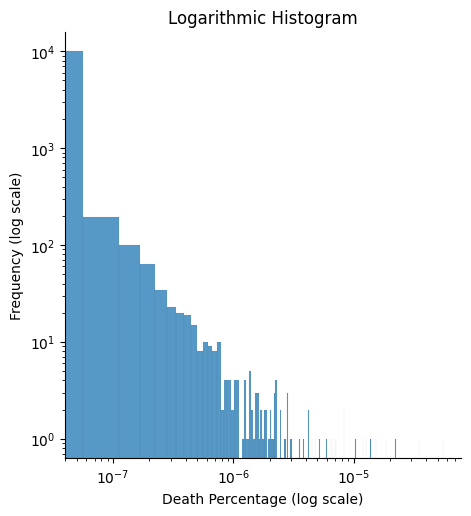

In [46]:
# Creating displot for death_percentage

displot_death_percentage = sns.displot(df['death_percentage'], bins=1000) # Shows extreme values
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Death Percentage (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram')

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.
# Also, the outlier values are valid due to deaths from natural disasters.

In [127]:
#Export Viz
displot_death_percentage.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'displot_death_percentage.png'))

In [54]:
df['death_percentage'].mean() # Check the mean

5.151901784289294e-08

In [55]:
df['death_percentage'].median() # Check the median

0.0

In [56]:
df['death_percentage'].max() # Check the max

5.578989548454187e-05

Text(0.5, 1.0, 'Logarithmic Histogram')

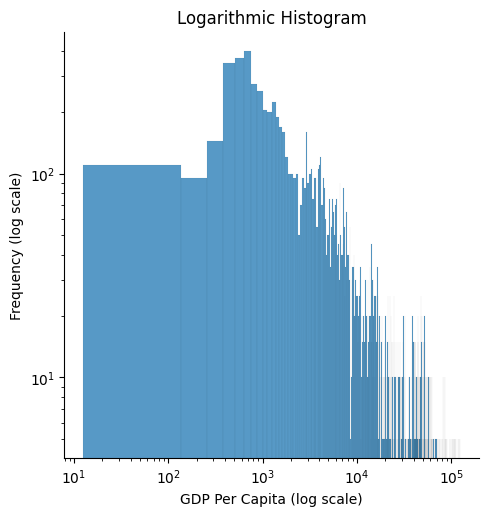

In [47]:
# Creating displot for death_percentage

displot_gdp_per_capita = sns.displot(df['gdp_per_capita'], bins=1000) # Shows extreme values
plt.yscale('log')
plt.xscale('log')

plt.xlabel('GDP Per Capita (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram')

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.
# Also, the outlier values are valid since the gdp_per_capita for some countries is very high.

In [128]:
#Export Viz
displot_gdp_per_capita.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'displot_gdp_per_capita.png'))

In [57]:
df['gdp_per_capita'].mean() # Check the mean

12628.759417951314

In [58]:
df['gdp_per_capita'].median() # Check the median

4623.819250461009

In [59]:
df['gdp_per_capita'].max() # Check the max

123678.70214391383

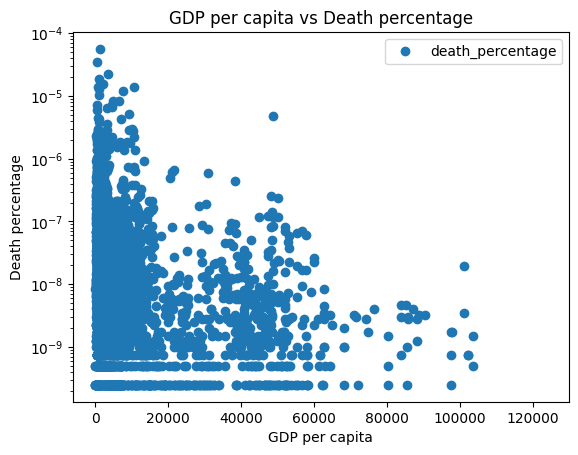

In [129]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

scatterplot_1 = df.plot(x = 'gdp_per_capita', y='death_percentage',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per capita vs Death percentage')  
plt.xlabel('GDP per capita')  
plt.ylabel('Death percentage')  
plt.yscale('log')
plt.show()

In [157]:
#Export Viz
scatterplot_1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_gdppercapita_deathpercentage.png'))

####  HYPOTHESIS: "If the gdp_per_capita increases, then the death percentage would decrease."

#### 3. Data prep for regression analysis

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['death_percentage'].values.reshape(-1,1)

In [61]:
X

array([[ 358.50822674],
       [ 358.50822674],
       [ 358.50822674],
       ...,
       [1235.17636489],
       [1235.17636489],
       [1235.17636489]])

In [62]:
y

array([[2.05878424e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [1.60372677e-08]])

In [63]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [64]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [65]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

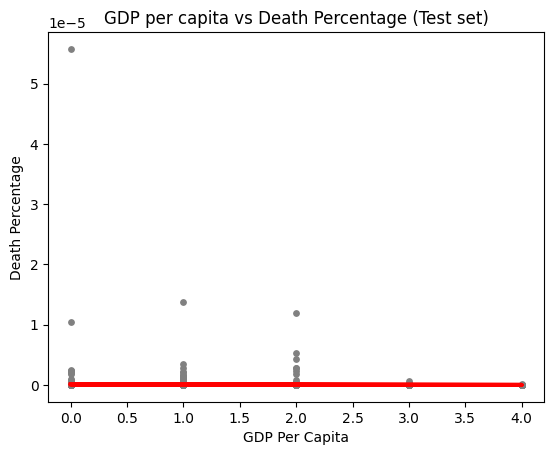

In [133]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_regression_test_set_1 = plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Death Percentage (Test set)')
plot_test.xlabel('GDP Per Capita')
plot_test.ylabel('Death Percentage')
plot_test.show()

In [134]:
#Export Viz
plot_regression_test_set_1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'regression_test_set_gdppercapita_deathpercentage.png'))

In [71]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [72]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.25535441e-12]]
Mean squared error:  1.1545837308503484e-12
R2 score:  0.0006473083982805328


1. The slope, represented by -1.25535441e-12 in scientific notation, is negative, which suggests that there is weak negative relationship between the GDP per capita and death percentage.

2. The low MSE, such as 1.1545837308503484e-12 (in scientific notation), indicates that the model's predictions are very close to the actual values, suggesting that the model is performing well in terms of fitting the data.

3. The low R-squared score, represented by 0.0006473083982805328, is close to zero, suggesting that the linear regression model is not a good fit for the data. The variance in the data could not be explained.

##### Checking the variance for both the independent and dependent variable

In [79]:
# Calculate the variance
variance = df['death_percentage'].var()

print("Variance:", variance)


Variance: 6.64665426086484e-13


In [80]:
variance = df['gdp_per_capita'].var()

print("Variance:", variance)

Variance: 342815402.6269035


In [73]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.000000e+00,6.122554e-08
1,6.515140e-09,6.442708e-08
2,0.000000e+00,6.470763e-08
3,0.000000e+00,5.519119e-08
4,0.000000e+00,6.368090e-08
5,0.000000e+00,6.313237e-08
6,0.000000e+00,5.797562e-08
7,0.000000e+00,5.945566e-08
8,0.000000e+00,5.456056e-08
9,0.000000e+00,6.061329e-08


#### There’s a big difference between the actual and predicted y values. 
#### This just adds evidence to the fact that the model is a poor fit does not explain the relationship between the variables.

##### Compare how the regression fits the training set

In [74]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [75]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [76]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.25535441e-12]]
Mean squared error:  4.5373888722219874e-13
R2 score:  0.0011690263916577237


#### The MSE and R2 score on the training set also indicates that it is a poor fitting model for the data.  

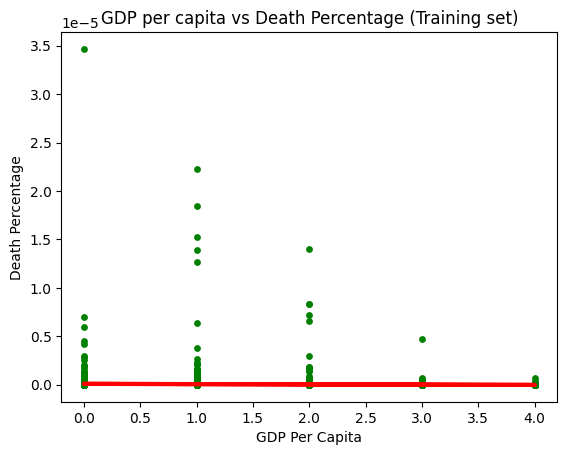

In [135]:
# Visualizing the training set results.

plot_test = plt
plot_regression_training_set_1 = plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Death Percentage (Training set)')
plot_test.xlabel('GDP Per Capita')
plot_test.ylabel('Death Percentage')
plot_test.show()

In [136]:
#Export Viz
plot_regression_training_set_1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'regression_training_set_gdppercapita_deathpercentage.png'))

#### The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.0011 as opposed to 0.000647). 
#### The model is not overfit. However, it also confirms that the relationship isn’t linear.

### Bonus: performance improvement after removing outliers

## Trying to check if another independent variable income_group has any linear relationship with death_percentage

#### HYPOTHESIS 2: "If the gdp_per_capita increases, then the death percentage would decrease."

In [81]:
# income_group ia a categorical variable

# Create a mapping between unique 'income_group' categories and unique numeric identifiers
income_group_mapping = {income_group: idx for idx, income_group in enumerate(df['income_group'].unique())}

# Add a new numeric 'income_group_id' column to your DataFrame using the mapping
df['income_group_id'] = df['income_group'].map(income_group_mapping)

In [86]:
df['income_group_id'].value_counts()

3    3050
1    2820
2    2740
0    2000
4      60
Name: income_group_id, dtype: int64

In [100]:
df['income_group'].value_counts()

High income            3050
Lower Middle income    2820
Upper Middle income    2740
Low income             2000
Null                     60
Name: income_group, dtype: int64

In [101]:
df.isnull().sum()

country_code        0
country             0
year                0
deaths              0
cause               0
total_population    0
gdp_value           0
income_group        0
region              0
sub_region          0
death_percentage    0
gdp_per_capita      0
income_group_id     0
dtype: int64

In [102]:
df_Nan_income_group = df[df['income_group'].isnull() == True]

In [103]:
df_Nan_income_group

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita,income_group_id


In [104]:
df.loc[df['income_group'] == 'Null']

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita,income_group_id
8690,SSD,South Sudan,2007,460,Conflict and Terrorism,8315139.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,1.152679e-07,1754.180343,4
8691,SSD,South Sudan,2007,500,Epidemics,8315139.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,1.252912e-07,1754.180343,4
8692,SSD,South Sudan,2007,0,Famine,8315139.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,0.000000e+00,1754.180343,4
8693,SSD,South Sudan,2007,0,Natural Disaster,8315139.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,0.000000e+00,1754.180343,4
8694,SSD,South Sudan,2007,60,Other Injuries,8315139.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,1.503494e-08,1754.180343,4
8695,SSD,South Sudan,2008,227,Conflict and Terrorism,8736939.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,5.688218e-08,1669.492414,4
8696,SSD,South Sudan,2008,133,Epidemics,8736939.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,3.332745e-08,1669.492414,4
8697,SSD,South Sudan,2008,0,Famine,8736939.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,0.000000e+00,1669.492414,4
8698,SSD,South Sudan,2008,17,Natural Disaster,8736939.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,4.259899e-09,1669.492414,4
8699,SSD,South Sudan,2008,67,Other Injuries,8736939.0,1.458625e+10,Null,Africa,Sub-Saharan Africa,1.678901e-08,1669.492414,4


In [ ]:
# Drop the records showing "Null" in the income_group column
# Only South Sudan(2007 - 2010) and Virgin Islands, U.S.(2007 - 2014) are dropped 

In [105]:
# Drop records where the 'income_group' column equals "Null" value
df = df[df['income_group'] != "Null"]

In [107]:
df.shape

(10610, 13)

In [108]:
df.columns

Index(['country_code', 'country', 'year', 'deaths', 'cause',
       'total_population', 'gdp_value', 'income_group', 'region', 'sub_region',
       'death_percentage', 'gdp_per_capita', 'income_group_id'],
      dtype='object')

In [110]:
df['income_group_id'].value_counts()

3    3050
1    2820
2    2740
0    2000
Name: income_group_id, dtype: int64

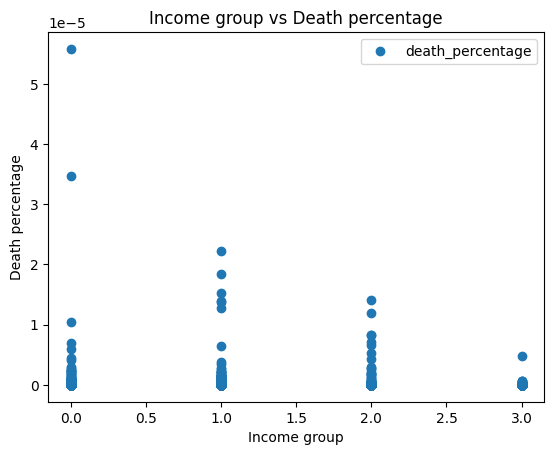

In [138]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

scatterplot_2 = df.plot(x = 'income_group_id', y='death_percentage',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Income group vs Death percentage')  
plt.xlabel('Income group')  
plt.ylabel('Death percentage')  
plt.show()

In [139]:
#Export Viz
scatterplot_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_incomegroup_deathpercentage.png'))

#### 3. Data prep for regression analysis

In [140]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['income_group_id'].values.reshape(-1,1)
y = df['death_percentage'].values.reshape(-1,1)

In [98]:
X

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [99]:
y

array([[2.05878424e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [1.60372677e-08]])

In [141]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression Analysis

In [142]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [143]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [144]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

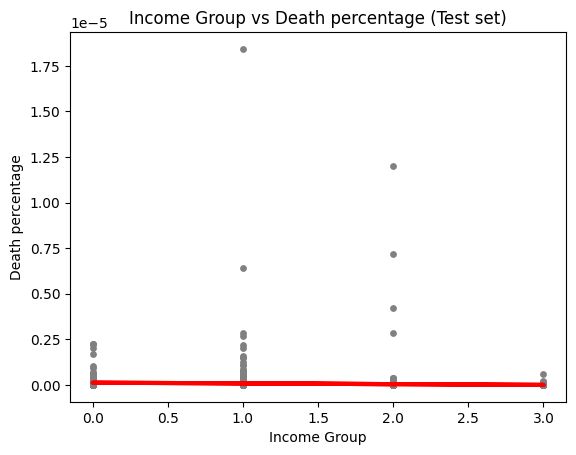

In [145]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_regression_test_set_2 = plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Income Group vs Death percentage (Test set)')
plot_test.xlabel('Income Group')
plot_test.ylabel('Death percentage')
plot_test.show()

In [146]:
#Export Viz
plot_regression_test_set_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'regression_test_set_incomegroup_deathpercentage.png'))

In [147]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [148]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.03723255e-08]]
Mean squared error:  2.1052532184738236e-13
R2 score:  -0.0028178741166080545


1. The slope, represented by -4.03723255e-08]] in scientific notation, is negative, which suggests that there is weak negative relationship between the GDP per capita and death percentage.

2. The low MSE, such as 2.1052532184738236e-13 (in scientific notation), indicates that the model's predictions are very close to the actual values, suggesting that the model is performing well in terms of fitting the data.

3. The low negative R-squared score, represented by -0.0028178741166080545, is close to zero, and might be worse than a horizontal line. It is suggesting that the linear regression model is not a good fit for the data. The variance in the data could not be explained.

In [149]:
y_predicted

array([[4.31403216e-08],
       [4.31403216e-08],
       [4.31403216e-08],
       ...,
       [1.23884973e-07],
       [2.76799611e-09],
       [8.35126471e-08]])

In [150]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.000000e+00,4.314032e-08
1,1.754076e-09,4.314032e-08
2,5.011646e-10,4.314032e-08
3,0.000000e+00,8.351265e-08
4,0.000000e+00,8.351265e-08
5,0.000000e+00,2.767996e-09
6,1.252912e-09,4.314032e-08
7,2.505823e-10,4.314032e-08
8,7.517469e-10,8.351265e-08
9,0.000000e+00,1.238850e-07


#### There’s a big difference between the actual and predicted y values. 
#### This just adds evidence to the fact that the model is a poor fit does not explain the relationship between the variables.

##### Compare how the regression fits the training set

In [151]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [152]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [153]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.03723255e-08]]
Mean squared error:  8.627132582769755e-13
R2 score:  0.0022213627507855493


#### The MSE and R2 score on the training set also indicates that it is a poor fitting model for the data.  

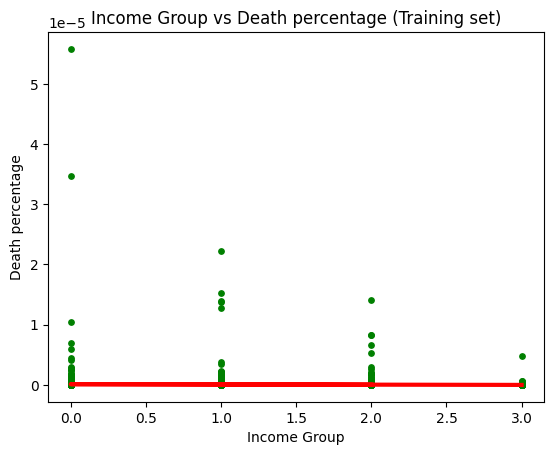

In [155]:
# Visualizing the training set results.

plot_test = plt
plot_regression_training_set_2 = plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Income Group vs Death percentage (Training set)')
plot_test.xlabel('Income Group')
plot_test.ylabel('Death percentage')
plot_test.show()

### Conclusion:
### So, both gdp_per_capita and income_group does not have a linear relationship with death_percentage.
### The linear regression model is a poor fit to the data in both cases.

In [156]:
#Export Viz
plot_regression_training_set_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'regression_training_set_incomegroup_deathpercentage.png'))

In [126]:
# Export the df dataset 
# Dropped the death_percentage and gdp_per_capita columns and regenerated from deaths, gdp_value and total_population columns.
# updated the region, sub_region columns which were Nan for "Taiwan"
# Created a new column, income_group_id to codify the income_group categorical variable.
# Dropped 60 observations where the income_group had a value "Null" as a string.

df.to_csv(os.path.join(path, 'Data','Prepared Data', 'causes_of_deaths_geo_cleaned_for_regression.csv'))